# 1. Introduction
## 1.1 Polynomial Curve Fitting

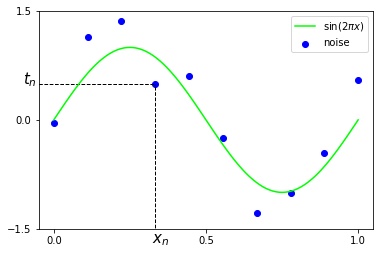

In [1]:
"""This is a test program."""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

noise_NUM = 10

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,noise_NUM,std_dev):
    x_n = np.linspace(0,1,noise_NUM)
    t_n = func(x_n)+ np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n


x = np.arange(0, 1.01, 0.01)
y = func(x)
x_n,t_n = generate_noise_data(func,noise_NUM,0.3)
plt.plot(x,y,color='lime',label="$\sin(2\pi x)$")
plt.scatter(x_n,t_n,marker='o',color='blue',label="noise")
plt.hlines(y=t_n[3], xmin=-2,xmax=x_n[3], linewidth=1,linestyle='--',color = 'k')
plt.vlines(x=x_n[3], ymin=-2, ymax=t_n[3], linewidth=1,linestyle='--',color = 'k')

plt.text(-0.1,t_n[3], "$t_n$",fontsize=15)
plt.text(x_n[3]-0.01,-1.7, "$x_n$",fontsize=15)
plt.yticks( [-1.5, 0.0, 1.5] )
plt.xticks( [0.0, 0.5, 1.0] )
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

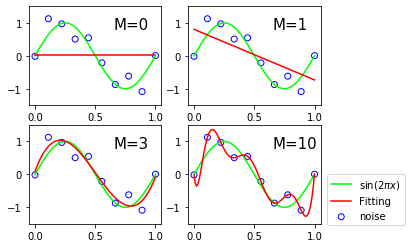

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fitting.multiple_regression import Multiple_Regression
from base_module.poly_feature import Poly_Feature

F_size = 15
noise_NUM = 10

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,N,std_dev):
    x_n = np.linspace(0,1,N)
    t_n = func(x_n) + np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n

# train data
x_n,t_n = generate_noise_data(func,noise_NUM,0.3)

# test data
x = np.arange(0, 1.01, 0.01)
y = func(x)

model = Multiple_Regression()

for i, deg in enumerate([0,1,3,10],1):
    plt.subplot(2, 2, i)
    feature = Poly_Feature(degree=deg)
    X_train = feature.transform(x_n)
    X_test = feature.transform(x)
    model.fit(X_train,t_n)
    plt.plot(x,y,color='lime',label="$\sin(2\pi x)$")
    plt.plot(x,model.predict(X_test),color='red',label="Fitting")
    plt.scatter(x_n,t_n,facecolor="none", edgecolor="b",label="noise")
    plt.text(0.65,0.8,"M={}".format(deg),fontsize=F_size)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.5, 1.5)
plt.subplots_adjust(right=0.8)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

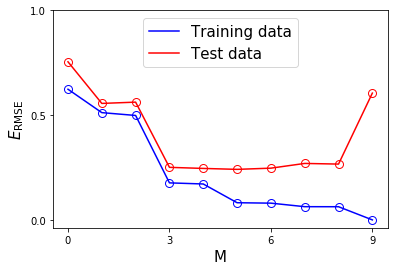

In [3]:
"""This is a test program for confirmation the RMSE."""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

F_size = 15

M_list = range(0,10)
noise_Num = len(M_list)
sigma = 0.2
RMSE_train = []
RMSE_test = []

def rmse(a,b):
    return np.sqrt(np.mean(np.square(a - b)))

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,noise_NUM,std_dev):
    x_n = np.linspace(0,1,noise_NUM)
    t_n = func(x_n) + np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n

train_x,train_t = generate_noise_data(func,noise_Num,sigma)
train_data = pd.DataFrame(np.array([train_x,train_t]).transpose(),columns=['x','t'])
test_x,test_t   = generate_noise_data(func,100,sigma)
test_data = pd.DataFrame(np.array([test_x,test_t]).transpose(),columns=['x','t'])

for M in M_list:
    weight_list = np.polyfit(train_data.x.values,train_data.t.values,M)
    RMSE_train.append(rmse(np.polyval(weight_list,np.array(train_data.x)),train_data.t))
    RMSE_test.append(rmse(np.polyval(weight_list,np.array(test_data.x)),test_data.t))



plt.plot(M_list,RMSE_train,label='Training data',color='blue')
plt.plot(M_list,RMSE_train,color='none',marker='o',markeredgecolor='blue',markersize=8,linewidth=0)
plt.plot(M_list,RMSE_test,label='Test data',color='red')
plt.plot(M_list,RMSE_test,color='none',marker='o',markeredgecolor='red',markersize=8,linewidth=0)
plt.yticks( [0,0.5,1] )
plt.xticks( [0,3,6,9] )
plt.xlabel("M",fontsize=F_size)
plt.ylabel(r"$E_{\mathrm{RMSE}}$",fontsize=F_size)
plt.legend(loc='upper center',fontsize=F_size)
plt.show()

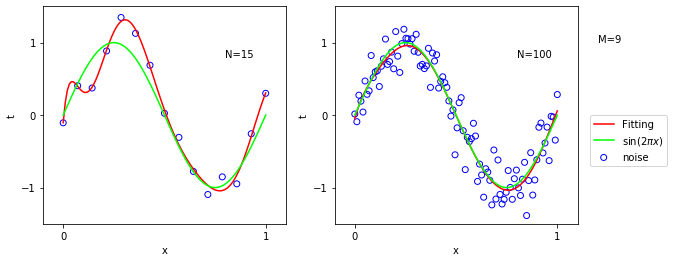

In [4]:
"""This is a test program for confirmation the Over fitting."""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

M = 9
noise_Num_list = [15,100]
sigma = 0.2


def rmse(a,b):
    return np.sqrt(mean_squared_error(a,b))

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,noise_NUM,std_dev):
    x_n = np.linspace(0,1,noise_NUM)
    t_n = func(x_n) + np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n

def generate_test_data(noise_Num):
    test_x,test_t = generate_noise_data(func,noise_Num,sigma)
    test_data = pd.DataFrame(np.array([test_x,test_t]).transpose(),columns=['x','t'])
    return test_data

fig = plt.figure(figsize=(11, 4.0))

x=np.arange(0,1.01,0.01)
for i,Num in enumerate(noise_Num_list,0):
    plt.subplot(1, 2, i+1)
    test_data = generate_test_data(Num)
    weight_list = np.polyfit(test_data.x.values,test_data.t.values,M)
    plt.plot(x,np.polyval(weight_list,x),color='r',label="Fitting")
    plt.plot(x,func(x),color='lime',label="$\sin(2\pi x)$")
    plt.scatter(test_data.x,test_data.t,marker='o',facecolor="none", edgecolor="b",label="noise")
    plt.yticks( [-1,0,1] )
    plt.xticks( [0,1] )
    plt.xlabel("x")
    plt.ylabel("t")
    plt.text(0.8,0.8,"N={}".format(Num))
    plt.xlim([-0.1,1.1])
    plt.ylim([-1.5,1.5])
plt.subplots_adjust(right=0.8)
plt.text(1.2,1,"M={}".format(M))
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()


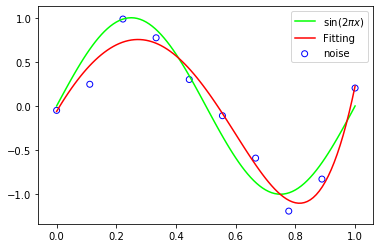

In [5]:
"""This is a test program."""
import numpy as np
import matplotlib.pyplot as plt
from fitting.multiple_regression import Multiple_Regression
from base_module import Poly_Feature

M = 9
noise_NUM = 10

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,N,std_dev):
    x_n = np.linspace(0,1,N)
    t_n = func(x_n) + np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n

# train data
x_n,t_n = generate_noise_data(func,noise_NUM,0.3)
feature = Poly_Feature(M)
X_train = feature.transform(x_n)

# test data
test_x = np.arange(0, 1.01, 0.01)
X_test = feature.transform(test_x)

'''Polynomial Regression'''
model = Multiple_Regression(alpha=(5*10**(-3))/11.1)
model.fit(X_train,t_n)
test_y = model.predict(X_test)

plt.plot(test_x,func(test_x),color='lime',label="$\sin(2\pi x)$")
plt.plot(test_x,test_y,color='red',label="Fitting")
plt.scatter(x_n,t_n,facecolor="none", edgecolor="b",label="noise")
plt.legend()
plt.show()


## 1.2.4 The Gaussian Distribution

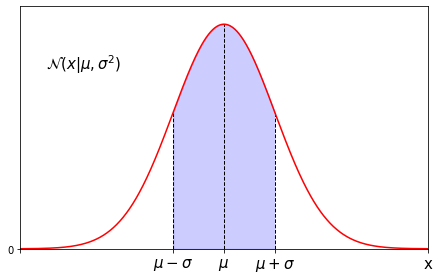

In [6]:
import numpy as np
from pd import *
import matplotlib.pyplot as plt

# ave
mu = 0

# std
sigma = np.sqrt(10)

# confidence interval
conf_L = mu - sigma
conf_R = mu + sigma
fill_x = np.arange(conf_L, conf_R, 0.01)

'''Gaussian distribution'''
prob = Gaussian(mu, sigma ** 2)
x = np.linspace(conf_L * 4, conf_R * 4, 1000)
y = prob.pdf(x)


# Plotting
fig = plt.figure(figsize=(6.2,4))
ax = fig.add_subplot(111)
ax.plot(x, y, color='red')
plt.text(conf_L * 3.5, 0.8 * max(y), r"$\mathcal{N}(x|\mu,\sigma^2)$",fontsize=15)
plt.fill_between(x, y, where = x > mu - sigma, color='b', alpha=0.2)
plt.fill_between(x, y, where = x > mu + sigma, color='w', alpha=1)
plt.vlines(x=mu, ymin=0, ymax=prob.pdf(mu), linewidth=1,linestyle='--',color = 'k')
plt.vlines(x=conf_L, ymin=0, ymax=prob.pdf(conf_L), linewidth=1,linestyle='--',color = 'k')
plt.vlines(x=conf_R, ymin=0, ymax=prob.pdf(conf_R), linewidth=1,linestyle='--',color = 'k')
plt.xticks([conf_L * 4, conf_L, mu, conf_R, conf_R * 4],("",r"$\mu-\sigma$",r"$\mu$",r"$\mu+\sigma$","x"),fontsize=15)
plt.yticks([0])
plt.xlim(conf_L * 4, conf_R * 4)
plt.ylim(0,max(y) + 0.01)
plt.tight_layout()
plt.show()

## 1.2.6 Bayesian curve fitting

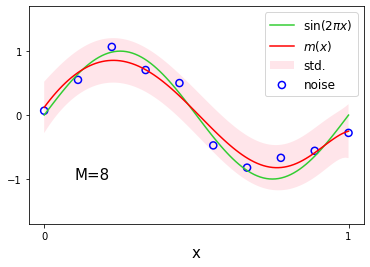

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from base_module.poly_feature import Poly_Feature
from fitting.bayesian_regression import Bayesian_Regression



M = 8
noise_NUM = 10


def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(func,noise_NUM,std_dev):
    x_n = np.linspace(0,1,noise_NUM)
    t_n = func(x_n) + np.random.normal(scale=std_dev,size=noise_NUM)
    return x_n,t_n

# Create the training data
train_x,train_y = generate_noise_data(func,noise_NUM,0.2)
feature = Poly_Feature(M)
X_train = feature.transform(train_x)

# Create the test data
test_x = np.arange(0, 1.01, 0.01)
test_y = func(test_x)
X_test = feature.transform(test_x)


'''----Bayesian Regression----'''
model = Bayesian_Regression(alpha=5*10**(-3),beta=11.1)
model.fit(X_train,train_y)
y_mean,y_std = model.predict(X_test,get_std=True)


# plot the test data
plt.plot(test_x,test_y,color='limegreen',label="$\sin(2\pi x)$")
plt.plot(test_x,y_mean,color='red',label="$m(x)$")
plt.fill_between(test_x, y_mean + y_std, y_mean - y_std, facecolor='pink',alpha=0.4,label="std.")

# plot the training data
plt.scatter(train_x,train_y,facecolor="none", edgecolor="b",label="noise",s=50,linewidth=1.5)

# config for drawing
plt.annotate("M={}".format(M), xy=(0.1, -1),fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("x",fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-1.7, 1.7)
plt.xticks([0,1])
plt.yticks([-1,0,1])
plt.show()